In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
# Paths
train_dir = r'C:\Users\aishw\OneDrive\Desktop\fingerprint-based-blood-group-detection-main\fingerprint-based-blood-group-detection-main\dataset\splitted_dataset\aug'
val_dir = r'C:\Users\aishw\OneDrive\Desktop\fingerprint-based-blood-group-detection-main\fingerprint-based-blood-group-detection-main\dataset\splitted_dataset\val'
test_dir = r'C:\Users\aishw\OneDrive\Desktop\fingerprint-based-blood-group-detection-main\fingerprint-based-blood-group-detection-main\dataset\splitted_dataset\test'


In [4]:
# Parameters
img_height, img_width = 224, 224
batch_size = 32
initial_epochs = 10
fine_tune_epochs = 15
total_epochs = initial_epochs + fine_tune_epochs

In [5]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width),
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True)

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width),
                                                batch_size=batch_size, class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width),
                                                  batch_size=batch_size, class_mode='categorical', shuffle=False)

num_classes = len(train_generator.class_indices)


Found 22239 images belonging to 8 classes.
Found 1267 images belonging to 8 classes.
Found 1277 images belonging to 8 classes.


In [5]:
# Model building
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [6]:
# Freeze all layers initially
base_model.trainable = False

inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Reshape((1, -1))(x)
x = LSTM(64)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Save best model
checkpoint = ModelCheckpoint('resnet50_lstm_finetuned_best.h5', monitor='val_accuracy', save_best_only=True)


In [8]:
# Initial training (frozen ResNet50)
print("\nTraining with frozen ResNet50...")
history_initial = model.fit(train_generator, epochs=initial_epochs,
                            validation_data=val_generator, callbacks=[checkpoint])



Training with frozen ResNet50...


C:\Users\aishw\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2019 - loss: 2.0194 

695/695 ━━━━━━━━━━━━━━━━━━━━ 8135s 12s/step - accuracy: 0.2020 - loss: 2.0193 - val_accuracy: 0.2021 - val_loss: 1.8970
Epoch 2/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3296 - loss: 1.8051

695/695 ━━━━━━━━━━━━━━━━━━━━ 1520s 2s/step - accuracy: 0.3297 - loss: 1.8050 - val_accuracy: 0.3694 - val_loss: 1.7111
Epoch 3/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3980 - loss: 1.6566

695/695 ━━━━━━━━━━━━━━━━━━━━ 1500s 2s/step - accuracy: 0.3981 - loss: 1.6566 - val_accuracy: 0.3852 - val_loss: 1.6090
Epoch 4/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4445 - loss: 1.5525

695/695 ━━━━━━━━━━━━━━━━━━━━ 1493s 2s/step - accuracy: 0.4445 - loss: 1.5525 - val_accuracy: 0.3946 - val_loss: 1.5591
Epoch 5/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4797 - loss: 1.4636

695/695 ━━━━━━━━━━━━━━━━━━━━ 1493s 2s/step - accuracy: 0.4797 - loss: 1.4636 - val_accuracy: 0.4870 - val_loss: 1.4320
Epoch 6/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1489s 2s/step - accuracy: 0.4978 - loss: 1.4045 - val_accuracy: 0.4594 - val_loss: 1.4175
Epoch 7/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5087 - loss: 1.3530

695/695 ━━━━━━━━━━━━━━━━━━━━ 1495s 2s/step - accuracy: 0.5087 - loss: 1.3530 - val_accuracy: 0.5193 - val_loss: 1.3346
Epoch 8/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1557s 2s/step - accuracy: 0.5337 - loss: 1.2947 - val_accuracy: 0.4886 - val_loss: 1.3473
Epoch 9/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1502s 2s/step - accuracy: 0.5404 - loss: 1.2587 - val_accuracy: 0.5012 - val_loss: 1.3138
Epoch 10/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 1496s 2s/step - accuracy: 0.5515 - loss: 1.2286 - val_accuracy: 0.5193 - val_loss: 1.2857


In [9]:
# Unfreeze top ResNet50 layers
print("\nFine-tuning ResNet50 top layers...")
base_model.trainable = True
# Fine-tune from this layer onward (e.g., unfreeze last 50 layers)
for layer in base_model.layers[:-50]:
    layer.trainable = False


Fine-tuning ResNet50 top layers...


In [10]:
# Compile again with lower LR
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
 #Continue training
history_finetune = model.fit(train_generator, epochs=total_epochs,
                             initial_epoch=history_initial.epoch[-1]+1,
                             validation_data=val_generator, callbacks=[checkpoint])


Epoch 11/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5127 - loss: 1.5852

695/695 ━━━━━━━━━━━━━━━━━━━━ 2360s 3s/step - accuracy: 0.5129 - loss: 1.5845 - val_accuracy: 0.6669 - val_loss: 0.8973
Epoch 12/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7482 - loss: 0.6758

695/695 ━━━━━━━━━━━━━━━━━━━━ 2353s 3s/step - accuracy: 0.7482 - loss: 0.6758 - val_accuracy: 0.7340 - val_loss: 0.7475
Epoch 13/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2344s 3s/step - accuracy: 0.7898 - loss: 0.5625 - val_accuracy: 0.7324 - val_loss: 0.6989
Epoch 14/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2369s 3s/step - accuracy: 0.8247 - loss: 0.4729 - val_accuracy: 0.6654 - val_loss: 0.9567
Epoch 15/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 4616s 7s/step - accuracy: 0.8517 - loss: 0.4087 - val_accuracy: 0.7293 - val_loss: 0.7613
Epoch 16/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8713 - loss: 0.3521

695/695 ━━━━━━━━━━━━━━━━━━━━ 2404s 3s/step - accuracy: 0.8713 - loss: 0.3521 - val_accuracy: 0.7624 - val_loss: 0.6197
Epoch 17/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2374s 3s/step - accuracy: 0.8907 - loss: 0.3094 - val_accuracy: 0.7119 - val_loss: 0.8319
Epoch 18/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8982 - loss: 0.2795

695/695 ━━━━━━━━━━━━━━━━━━━━ 2415s 3s/step - accuracy: 0.8982 - loss: 0.2795 - val_accuracy: 0.7640 - val_loss: 0.6418
Epoch 19/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2524s 4s/step - accuracy: 0.9218 - loss: 0.2317 - val_accuracy: 0.7261 - val_loss: 0.8342
Epoch 20/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2369s 3s/step - accuracy: 0.9283 - loss: 0.2086 - val_accuracy: 0.6977 - val_loss: 0.8907
Epoch 21/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2354s 3s/step - accuracy: 0.9364 - loss: 0.1829 - val_accuracy: 0.7553 - val_loss: 0.6900
Epoch 22/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2420s 3s/step - accuracy: 0.9476 - loss: 0.1624 - val_accuracy: 0.7372 - val_loss: 0.8258
Epoch 23/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2488s 4s/step - accuracy: 0.9489 - loss: 0.1591 - val_accuracy: 0.7609 - val_loss: 0.7308
Epoch 24/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2419s 3s/step - accuracy: 0.9545 - loss: 0.1377 - val_accuracy: 0.7301 - val_loss: 0.8356
Epoch 25/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2410s 3s/step - accuracy: 0.9604 - loss: 0.1235 - val_

In [12]:
# Combine history
history = history_initial.history
for k in history_finetune.history:
    history[k].extend(history_finetune.history[k])


In [19]:
# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


40/40 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7113 - loss: 0.9821

Test Accuracy: 72.28%


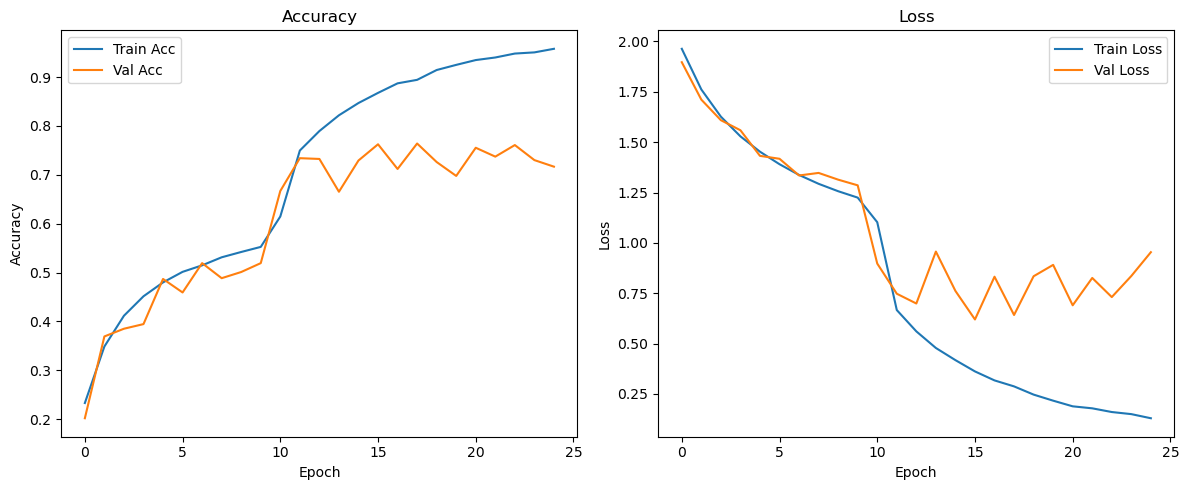

In [20]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Acc')
plt.plot(history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Classification report
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


40/40 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step

Classification Report:

              precision    recall  f1-score   support

          A+       0.58      0.83      0.68       139
          A-       0.87      0.55      0.67       201
         AB+       0.82      0.59      0.69       149
         AB-       0.75      0.75      0.75       153
          B+       0.79      0.85      0.82       165
          B-       0.83      0.86      0.84       149
          O+       0.78      0.57      0.66       178
          O-       0.54      0.86      0.67       143

    accuracy                           0.72      1277
   macro avg       0.75      0.73      0.72      1277
weighted avg       0.75      0.72      0.72      1277



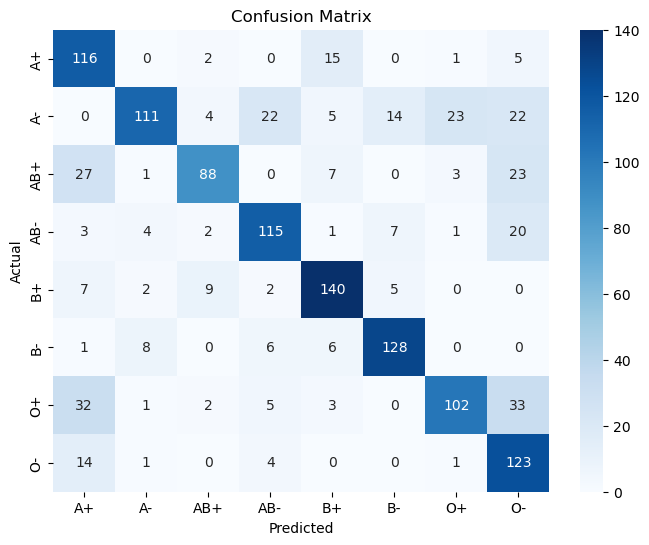

In [22]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()